<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Q-5.8" data-toc-modified-id="Q-5.8-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Q 5.8</a></span><ul class="toc-item"><li><span><a href="#(a)" data-toc-modified-id="(a)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>(a)</a></span></li><li><span><a href="#(b)" data-toc-modified-id="(b)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>(b)</a></span></li><li><span><a href="#(c)" data-toc-modified-id="(c)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>(c)</a></span></li><li><span><a href="#(d)" data-toc-modified-id="(d)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>(d)</a></span></li><li><span><a href="#(e)" data-toc-modified-id="(e)-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>(e)</a></span></li><li><span><a href="#(f)" data-toc-modified-id="(f)-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>(f)</a></span></li></ul></li><li><span><a href="#Q-6.2" data-toc-modified-id="Q-6.2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Q 6.2</a></span><ul class="toc-item"><li><span><a href="#(a)" data-toc-modified-id="(a)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>(a)</a></span></li><li><span><a href="#(b)-for-ridge-regression-relative-to-least-squares." data-toc-modified-id="(b)-for-ridge-regression-relative-to-least-squares.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>(b) for ridge regression relative to least squares.</a></span></li><li><span><a href="#(c)-for-non-linear-methods-relative-to-least-squares." data-toc-modified-id="(c)-for-non-linear-methods-relative-to-least-squares.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>(c) for non-linear methods relative to least squares.</a></span></li></ul></li><li><span><a href="#Q-6.10" data-toc-modified-id="Q-6.10-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Q 6.10</a></span><ul class="toc-item"><li><span><a href="#(a)" data-toc-modified-id="(a)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>(a)</a></span></li><li><span><a href="#(b)" data-toc-modified-id="(b)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>(b)</a></span></li><li><span><a href="#(c)" data-toc-modified-id="(c)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>(c)</a></span></li><li><span><a href="#(d)" data-toc-modified-id="(d)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>(d)</a></span></li><li><span><a href="#(e)" data-toc-modified-id="(e)-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>(e)</a></span></li><li><span><a href="#(f)" data-toc-modified-id="(f)-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>(f)</a></span></li><li><span><a href="#(g)" data-toc-modified-id="(g)-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>(g)</a></span></li></ul></li></ul></div>

Book questions 5.8, 6.2, 6.10.
# Q 5.8
Perform cross-validation on a simulated data set.

In [18]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm  # To fit models using least squares

%matplotlib inline

## (a)
Generate a simulated data set and set seed as one.

In [28]:
np.random.seed(10)
x= np.random.normal(size= 100)
y= np.random.normal(size= 100)
epsilon= np.random.normal(size= 100)
y = x - 2*(x**2) +epsilon

In this data set we have n =100 and p =2 , (x, $x^2$), the model will be $$y = x - 2x^2 + \epsilon$$

## (b)

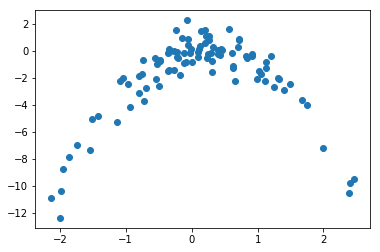

In [29]:
plt.scatter(x,y)

*  Quadratic plot
*  Convex function with negative concavity

## (c)

In [30]:
np.random.seed(5)

# create LOOCV obejct
loocv = LeaveOneOut()

# create dataframe of x and y
df = pd.DataFrame({'x':x, 'y' :y})
df.head()

,x,y
0,1.331587,-2.081521
1,0.715279,0.894775
2,-1.545400,-7.346677
3,-0.008384,0.151875
4,0.621336,-1.281256


In [31]:
scores = []

for i in range(1,5): # degree 1,2,3,4
    for train,test in loocv.split(df):
        x_train = df['x'][train]
        x_test = df['x'][test]
        y_train = df['y'][train]
        y_test = df['y'][test]
        
        # pipeline
        model = Pipeline([('poly', PolynomialFeatures(degree=i)),
                        ('linear', LinearRegression())])
        model.fit(x_train[:, np.newaxis],y_train)
        
        # MSE
        score = mean_squared_error(y_test, model.predict(x_test[:, np.newaxis]))
        scores.append(score)
    print('Model with degree {} has MSE {}'.format(i, round(np.mean(scores),3)))
    score = []

Model with degree 1 has MSE 9.693
Model with degree 2 has MSE 5.288
Model with degree 3 has MSE 3.826
Model with degree 4 has MSE 3.101


## (d) 
use anotheer random seed

In [32]:
np.random.seed(2019)

# create LOOCV obejct
loocv = LeaveOneOut()

# create dataframe of x and y
df = pd.DataFrame({'x':x, 'y' :y})
scores = []

for i in range(1,5): # degree 1,2,3,4
    for train,test in loocv.split(df):
        x_train = df['x'][train]
        x_test = df['x'][test]
        y_train = df['y'][train]
        y_test = df['y'][test]
        
        # pipeline
        model = Pipeline([('poly', PolynomialFeatures(degree=i)),
                        ('linear', LinearRegression())])
        model.fit(x_train[:, np.newaxis],y_train)
        
        # MSE
        score = mean_squared_error(y_test, model.predict(x_test[:, np.newaxis]))
        scores.append(score)
    print('Model with degree {} has MSE {}'.format(i, round(np.mean(scores),3)))
    score = []

Model with degree 1 has MSE 9.693
Model with degree 2 has MSE 5.288
Model with degree 3 has MSE 3.826
Model with degree 4 has MSE 3.101


The results are exactly **the same** because we only remove one observation from the training set. Thus, there is no random effect resulting from the observations used for the test set. LOOCV will always be the same, no matter the random seed.



## (e)
The model that had the smallest LOOCV error was model 4. This was an expected result because model (4) consider more predictors and has smaller MSE.

## (f)

In [33]:
for i in range(1,5):
    pol = PolynomialFeatures(degree = i)
    X_pol = pol.fit_transform(df['x'][:,np.newaxis])
    y = df['y']

    model = sm.OLS(y, X_pol)
    results = model.fit()

    print(results.summary())  

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     3.954
Date:                Fri, 15 Feb 2019   Prob (F-statistic):             0.0495
Time:                        21:29:51   Log-Likelihood:                -250.64
No. Observations:                 100   AIC:                             505.3
Df Residuals:                      98   BIC:                             510.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8764      0.301     -6.240      0.0

As we can see, when we have a second order polynomial, both $x_1$ and $x_2$ have high t-statistic values. When we have a third order polynomial, $x_2$ has the highest t-statistic, followed by $x_1$ and then by $x_3$. Finally, when we have a fourth order polynomial, $x_2$ is the variable with the highest t-statistic, followed by $x_1$, $x_3$ and $x_4$.

We can conclude that $x_2$ and $x_1$ are variables with relevance for the presented models. These results agree with the conclusions drawn based on the cross-validation results, showing that the first and second order terms are the most significant.



# Q 6.2
## (a)

![](621.PNG)

> Answer : False. Lasso reduces the number of variables, thus is less flexible.

![](622.PNG)

> Answer : False. Lasso reduces the number of variables, thus is less flexible.

![](623.PNG)

> Answer : True.

![](624.PNG)

> Answer : False. In general, lasso reduces variance and increases bias. Reduction in variance should compensate increasement in bias.


## (b) for ridge regression relative to least squares.
Same answer as (a)

## (c) for non-linear methods relative to least squares.
*  (i) False. In general, non-linear methods reduce bias and increase variance. Reduction in bias should be compensate increasement in variance.  
*  (ii) True.  
*  (iii) False. Non-linear methods are more flexible because they accomodate to the data. Unlike least squares, non-linear methods don't assume a parametrized relationship between the predictors and the response.  
*  (iv) False. Same justification as in (iii).

# Q 6.10


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import statsmodels.api as sm

from sklearn import model_selection
from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline

## (a)

In [2]:
np.random.seed(5)
X = np.random.randn(1000,15)
beta = np.random.choice(np.arange(-3,3),15,replace=True)
epsilon = np.random.randn(1000)*2
y = np.dot(X,beta) + epsilon

## (b)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
len(X_train)

100

## (c)


In [4]:
def process_subset(features):
    regr = LinearRegression(fit_intercept=False)
    regr.fit(X_train[list(features)], y_train)
    MSE_train = mean_squared_error(regr.predict(X_train[list(features)]),
                             y_train)
    MSE_test = mean_squared_error(regr.predict(X_test[list(features)]),
                                y_test)
    
    return {"model": regr, "MSE_train": MSE_train, "MSE_test": MSE_test,
           "features": features}


def get_best(k):
    results = []
    for combo in itertools.combinations(X_train.columns, k):
        results.append(process_subset(combo))
        
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['MSE_train'].idxmin()]
    
    return best_model

models = pd.DataFrame(columns=["MSE_train", "MSE_test", "model", "features"])

In [5]:
for i in range(1, 16):
    models.loc[i] = get_best(i)

models

,MSE_train,MSE_test,model,features
1,29.814266,30.250053,"LinearRegression(copy_X=True, fit_intercept=Fa...","(1,)"
2,25.334181,22.704728,"LinearRegression(copy_X=True, fit_intercept=Fa...","(1, 3)"
3,21.486534,19.444334,"LinearRegression(copy_X=True, fit_intercept=Fa...","(1, 3, 12)"
4,17.239034,16.272487,"LinearRegression(copy_X=True, fit_intercept=Fa...","(0, 1, 3, 12)"
5,14.383812,11.986615,"LinearRegression(copy_X=True, fit_intercept=Fa...","(0, 1, 3, 12, 14)"
6,11.524801,11.521164,"LinearRegression(copy_X=True, fit_intercept=Fa...","(0, 1, 3, 11, 12, 14)"
7,9.405611,10.667719,"LinearRegression(copy_X=True, fit_intercept=Fa...","(0, 1, 3, 7, 11, 12, 14)"
8,7.773684,9.861876,"LinearRegression(copy_X=True, fit_intercept=Fa...","(0, 1, 3, 7, 9, 11, 12, 14)"
9,6.655127,8.787867,"LinearRegression(copy_X=True, fit_intercept=Fa...","(0, 1, 2, 3, 7, 9, 11, 12, 14)"
10,5.465757,7.769397,"LinearRegression(copy_X=True, fit_intercept=Fa...","(0, 1, 2, 3, 5, 7, 9, 11, 12, 14)"


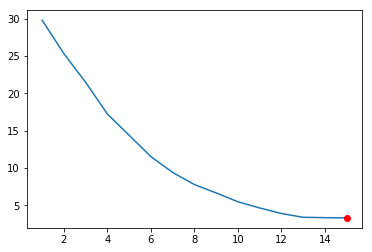

In [6]:
plt.plot(models['MSE_train'])
plt.plot(models['MSE_train'].idxmin(),models['MSE_train'].min(), "or")

## (d)

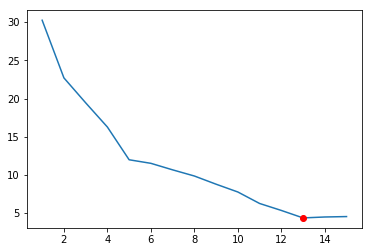

In [7]:
plt.plot(models['MSE_test'])
plt.plot(models['MSE_test'].idxmin(),models['MSE_test'].min(), "or")

## (e)
13 predictors
## (f)

In [8]:
# Construct coefficients 'coefs'. coefficients not used in the model
# are set to zero.
coefs = np.zeros(15)
for i, beta_num in enumerate(models.loc[13, 'features']):
    coefs[beta_num] = models.loc[13,'model'].coef_[i]
    
result = pd.DataFrame({'model':coefs, 'true':beta})
result

,model,true
0,-1.793899,-2
1,2.083488,2
2,-1.204322,-1
3,-2.678047,-3
4,0.967892,1
5,-1.042989,-1
6,0.000000,0
7,1.140474,1
8,0.000000,0
9,1.059123,1


## (g)

In [9]:
norms = []
for model_num in range(1,16):
    coefs = np.zeros(15)
    for i, beta_num in enumerate(models.loc[model_num, 'features']):
        coefs[beta_num] = models.loc[model_num,'model'].coef_[i]
        
    norm = np.sqrt(((coefs - beta)**2).sum())
    norms.append(norm)

norms = pd.DataFrame({'norm':norms}, index=np.arange(1,16))

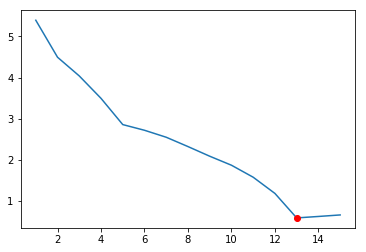

In [10]:
plt.plot(norms['norm'])
plt.plot(norms['norm'].idxmin(), norms['norm'].min(), "or")

> the same result comparing to the test MSE plot from (d)